# Principal Component analysis(PCA), Glass Dtatset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
from numpy.linalg import eig

In [2]:
df = pd.read_csv("https://gist.githubusercontent.com//yifancui/e1d5ce0ba59ba0c275c0e2efed542a37//raw//dde7dbca24429542ff78964b83aaf064142dd771//data.csv")

In [3]:
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id number,214.0,107.500000,61.920648,1.00000,54.250000,107.50000,160.750000,214.00000
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


# STEP_01 - Standarization of the data

In [7]:
#Import StandardScaler from sklearn.preprocessing

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [8]:
#Transform the data

scale_data=scaler.fit_transform(df)

In [9]:
#Create DataFrame for scaled data

scaled_df=pd.DataFrame(data=scale_data,columns=df.columns)

In [10]:
scaled_df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,-1.723976,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,-0.848275
1,-1.707788,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,-0.848275
2,-1.691601,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,-0.848275
3,-1.675413,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,-0.848275
4,-1.659226,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,-0.848275


In [11]:
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id number,214.0,2.075183e-18,1.002345,-1.723976,-0.861988,0.000000,0.861988,1.723976
RI,214.0,-2.877449e-14,1.002345,-2.381516,-0.608273,-0.226229,0.261433,5.137232
Na,214.0,2.179980e-15,1.002345,-3.286943,-0.614158,-0.132382,0.512033,4.875637
Mg,214.0,-2.801497e-16,1.002345,-1.865511,-0.395774,0.552779,0.636168,1.254639
Al,214.0,-3.434428e-16,1.002345,-2.318616,-0.511756,-0.170460,0.371598,4.125851
Si,214.0,9.966067e-16,1.002345,-3.676472,-0.480029,0.179965,0.564962,3.570524
K,214.0,7.470660e-17,1.002345,-0.763919,-0.575650,0.089053,0.173582,8.780145
Ca,214.0,-3.137418e-16,1.002345,-2.484084,-0.504966,-0.251413,0.151806,5.094318
Ba,214.0,-1.763906e-16,1.002345,-0.352877,-0.352877,-0.352877,-0.352877,5.997210
Fe,214.0,-6.121791e-17,1.002345,-0.586451,-0.586451,-0.586451,0.442242,4.659881


In [12]:
#Import PCA from sklearn.decomposition

from sklearn.decomposition import PCA
pca=PCA()

In [13]:
##Calculate Eigen value and Eigen vector internaly in PCA Librfary
##Some steps internaly done by PCA

In [14]:
#Transform the scaled df

pca.fit_transform(scaled_df)

array([[-2.14540054e+00,  2.64014297e-01, -3.87762407e-01, ...,
         5.36416639e-01,  1.33906996e-01,  2.89248175e-02],
       [-1.28910765e+00, -1.20019734e+00, -5.54530792e-01, ...,
         3.50000390e-01, -1.15547149e-01, -3.19266511e-03],
       [-1.16362112e+00, -1.57932728e+00, -5.59147195e-01, ...,
         2.17241786e-01,  1.96530574e-02,  2.95519135e-02],
       ...,
       [ 4.35968593e+00,  1.01019036e+00, -7.77017511e-01, ...,
         4.47834271e-01, -7.67777248e-01,  3.97157337e-02],
       [ 4.47817366e+00,  1.66917419e-01, -1.09552917e+00, ...,
        -1.66018955e-01, -1.92025569e-02, -3.00614390e-02],
       [ 4.55257284e+00,  4.07696907e-01, -7.38339961e-01, ...,
        -1.60168237e-01, -2.96910115e-02, -2.23150790e-02]])

In [15]:
#Shape of scaled_df after transformed

scaled_df.shape

(214, 11)

In [16]:
#Create DataFrame for scaled data after transformed
#pc--->principal component

pc_df=pd.DataFrame(data=pca.fit_transform(scaled_df))

In [17]:
pc_df.shape

(214, 11)

In [18]:
pc_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-2.145401,0.264014,-0.387762,1.765823,-0.266842,0.489990,-0.462158,0.164977,0.536417,0.133907,0.028925
1,-1.289108,-1.200197,-0.554531,0.882826,-0.282599,0.457016,-0.372088,0.916359,0.350000,-0.115547,-0.003193
2,-1.163621,-1.579327,-0.559147,0.342617,-0.269158,0.727045,-0.665280,0.725821,0.217242,0.019653,0.029552
3,-1.618372,-0.979452,-0.142261,0.485544,-0.503268,0.654993,-0.244923,0.532623,0.273439,0.179534,0.102463
4,-1.544870,-1.208490,-0.515592,0.147664,-0.460850,0.702207,-0.059949,0.634911,0.342089,-0.002751,0.010777


In [19]:
#Calculate the variance

var=pca.explained_variance_ratio_

In [20]:
var

array([3.33331447e-01, 2.14064700e-01, 1.28161256e-01, 1.06886695e-01,
       8.31641091e-02, 5.51906472e-02, 3.36650601e-02, 3.29466941e-02,
       7.63159290e-03, 4.81504295e-03, 1.42755190e-04])

In [21]:
type(var)

numpy.ndarray

In [22]:
#max variance

max(var)


0.3333314474100537

In [23]:
#min variance

min(var)

0.00014275518994368567

In [24]:
#Total variance

sum(var)

0.9999999999999998

In [25]:
#Loss of the data in PCA

1-(sum(var))

2.220446049250313e-16

In [26]:
var

array([3.33331447e-01, 2.14064700e-01, 1.28161256e-01, 1.06886695e-01,
       8.31641091e-02, 5.51906472e-02, 3.36650601e-02, 3.29466941e-02,
       7.63159290e-03, 4.81504295e-03, 1.42755190e-04])

In [27]:
arr = np.array([var])

In [28]:
#Sort the array

np.sort(arr)[::-1]

array([[1.42755190e-04, 4.81504295e-03, 7.63159290e-03, 3.29466941e-02,
        3.36650601e-02, 5.51906472e-02, 8.31641091e-02, 1.06886695e-01,
        1.28161256e-01, 2.14064700e-01, 3.33331447e-01]])

In [29]:
#Sum of 6 highest PC

sum(sorted (var,reverse= True)[:6])

0.9207988546887467

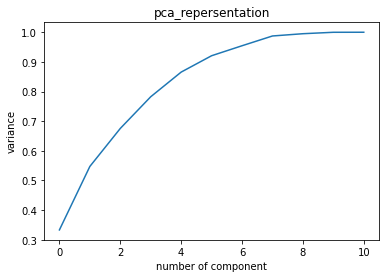

In [30]:
plt.figure()
plt.plot(np.cumsum(var))
plt.xlabel("number of component")
plt.ylabel("variance")
plt.title("pca_repersentation")
plt.show()

In [31]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [32]:
pc_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-2.145401,0.264014,-0.387762,1.765823,-0.266842,0.489990,-0.462158,0.164977,0.536417,0.133907,0.028925
1,-1.289108,-1.200197,-0.554531,0.882826,-0.282599,0.457016,-0.372088,0.916359,0.350000,-0.115547,-0.003193
2,-1.163621,-1.579327,-0.559147,0.342617,-0.269158,0.727045,-0.665280,0.725821,0.217242,0.019653,0.029552
3,-1.618372,-0.979452,-0.142261,0.485544,-0.503268,0.654993,-0.244923,0.532623,0.273439,0.179534,0.102463
4,-1.544870,-1.208490,-0.515592,0.147664,-0.460850,0.702207,-0.059949,0.634911,0.342089,-0.002751,0.010777


In [33]:
PCA(n_components=6)


PCA(n_components=6)

In [34]:
#We will take 6 Principal Component as it has 92 % data variace